<a href="https://colab.research.google.com/github/uol-mediaprocessing/notebooks/blob/master/6-edge-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge Detection

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

First of all, let's take a picture:


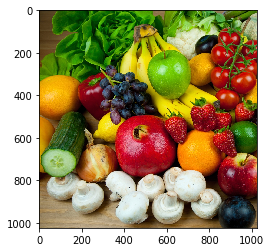

In [3]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/notebooks/master/pictures/image36.jpg
img = cv2.imread("image36.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Custom Filters
In OpenCV, we can define a custom filter like this:

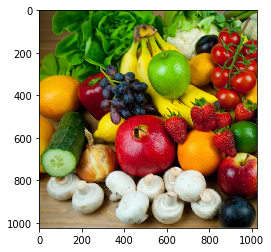

In [8]:
kernel = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
])
kernel = kernel / kernel.sum()
filtered = cv2.filter2D(img, cv2.CV_16S, kernel)
plt.imshow(filtered)

# Derivation Filters
The derivation of an image can be approximated with these filters to find edges:
- Derivation filter for the horizontal direction: <br>
$
\begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}
$
- Derivation filter for the vertical direction: <br>
$
\begin{bmatrix}
-1 \\
0 \\
1
\end{bmatrix}
$

We apply these filters to the image seperately, and use the absolute values of the results to approximate the derivation in both the X and the Y direction.

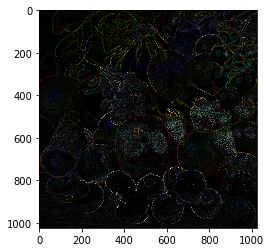

In [44]:
kernel_horizontal = np.array([
    [-1, 0, 1]
])
derivation_horizontal = cv2.filter2D(img, cv2.CV_16S, kernel_horizontal)
derivation_horizontal = np.absolute(derivation_horizontal)

kernel_vertical = np.array([
    [-1],
    [ 0],
    [ 1]
])
derivation_vertical = cv2.filter2D(img, cv2.CV_16S, kernel_vertical)
derivation_vertical = np.absolute(derivation_vertical)

derivation = np.add(derivation_horizontal, derivation_vertical)
derivation = derivation / derivation.max()

plt.imshow(derivation)

# Prewitt Operator
The **Prewitt Operator** expands on the derivation by adding **rows** or **columns** to the respective kernel in **horizontal** or **vertical** direction.  
The new filters look like this:  
Horizontal: 
$
H^P_x =\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Vertical: 
$
H^P_y =\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$  
Now, we can apply these filters to the image in the same way as before:

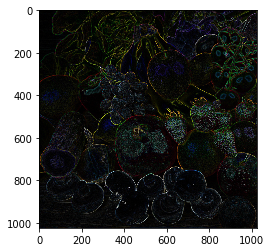

In [46]:
kernel_horizontal = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
edges_horizontal = cv2.filter2D(img, cv2.CV_16S, kernel_horizontal)
edges_horizontal = np.absolute(edges_horizontal)

kernel_vertical = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])
edges_vertical = cv2.filter2D(img, cv2.CV_16S, kernel_vertical)
edges_vertical = np.absolute(edges_vertical)

edges = np.add(edges_horizontal, edges_vertical)
edges = edges / edges.max()

plt.imshow(edges)

# Sobel Operator
The **Sobel Operator** is comparable to the **Prewitt Operator**, but it puts a stronger emphasis on the **central rows** and **columns**:  
Horizontal: 
$
H^S_x =\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Vertical: 
$
H^S_y =\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$

Now, we can apply these filters to the image in the same way as before:

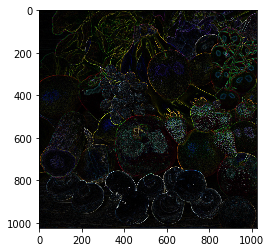

In [47]:
kernel_horizontal = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
edges_horizontal = cv2.filter2D(img, cv2.CV_16S, kernel_horizontal)
edges_horizontal = np.absolute(edges_horizontal)

kernel_vertical = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])
edges_vertical = cv2.filter2D(img, cv2.CV_16S, kernel_vertical)
edges_vertical = np.absolute(edges_vertical)

edges = np.add(edges_horizontal, edges_vertical)
edges = edges / edges.max()

plt.imshow(edges)

# Edge Detection with Canny
The **Canny Algorithm** aims to **localize** the edges in an image **more accurately**. 
To ensure, that an edge is not wider than a single pixel, Canny searches for **local maximums** in edge strength.  
>**For each pixel**, Canny checks whether its **adjacent pixels** have a higher **edge
strength** than the pixel itself.  
**If** this is the case, its **edge strength** is set to **0**.  

Then, a **thresholding** procedure is used to **discretize** the values into a **binary** map:
> We define the two **thresholds** $T_{low}$ and $T_{high}$ as **parameters** of the Canny Algorithm.
- **If** a local maximum is above $T_{high}$, it is instantly **detected** as edge pixel
- **If** a local maximum is below $T_{low}$, it is instantly **rejected** as edge pixel
- **If** a local maximum is between $T_{low}$ and $T_{high}$, it is **accepted**, **if** there is a **path** of pixels with $f(x_i, y_i) > T_{low}$ to a pixel with $f(x, y) > T_{high}$

In OpenCV, we can use this function to easily apply the Canny Edge Detection to an image:

$\text{cv2.Canny}(\text{image}, T_{low}, T_{high})$


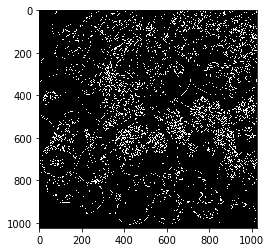

In [22]:
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny, cmap="gray")